<div style="display: flex; justify-content: center;">
    <img src="data/bane.png" style="border-radius: 20px; width: 60%;">
</div>

## LIBRERÍAS USADAS.


In [1]:
import pandas as pd 
from scipy.stats import f_oneway 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
import numpy as np 
import scipy.stats as stats 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
pd.set_option('display.max_rows', None) #Con esto quitamos el limite y vemos todas las filas.
pd.set_option('display.max_columns', None)# Ajustar las opciones de pandas para mostrar todas las columnas 
from sklearn.preprocessing import OneHotEncoder , StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

## CARGA DE DATOS.

In [2]:
df = pd.read_csv("./data/train.csv") 


## PEQUEÑA VISUALIZACIÓN DE LOS DATASETS.

In [3]:
df.head(5)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


>Vemos que no hay nulos

## ESTUDIO/PREPARACION DE CADA COLUMNA.

## 1ª columna: "id".

In [5]:
#df['id'].value_counts()

>No hay ninguna entrada repetida. Esto es importante en una columna con identificadores, no es necesario hacer nada a esta columna.

## 2ª columna: "laptop_ID".

In [6]:
#df['laptop_ID'].value_counts()

>En principio, podemos suponer que esta columna la podemos eliminar. No hay entradas repetidas, parece ser un ID y no es el ID que necesitamos usar para nuestro modelado. Además, no parece dar ninguna información, pero para asegurarnos, veremos si hay alguna relación.

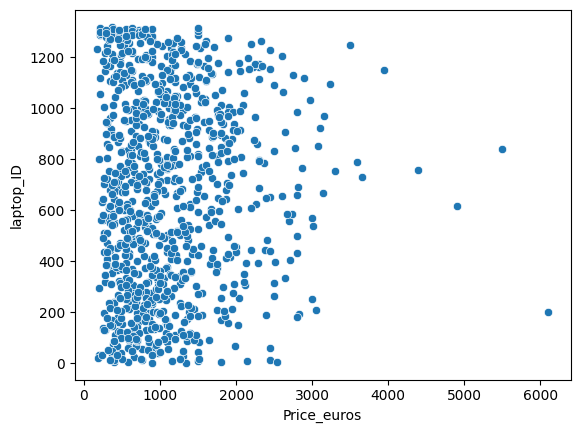

La correlación entre 'laptop_ID' y 'Price_euros' es 0.05280814891603999


In [7]:
sns.scatterplot(data=df, x='Price_euros' , y='laptop_ID')
plt.show()


correlacion = df['laptop_ID'].corr(df['Price_euros'])
print("La correlación entre 'laptop_ID' y 'Price_euros' es", correlacion)

> Viendo el gráfico, no parece haber un patrón claro y, además, la correlación es muy baja... Así que parece que mandamos a la columna a por tabaco.

In [8]:
df.drop(columns=['laptop_ID'], inplace=True) 


## 3ª columna: "Company".

In [9]:
df['Company'].value_counts()


Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

> No parece haber ninguna marca mal escrita o de forma diferente, por lo que de momento no será necesario hacerle ningún cambio. Aunque más tarde la convertiremos a numérica, de momento podemos ver su relación con el target, el precio del ordenador. Pero tenga o no relación, de momento no la eliminaremos.

In [10]:
anova_result = stats.f_oneway(*(df[df['Company'] == company]['Price_euros'] for company in df['Company'].unique()))
print('ANOVA results:', anova_result)

ANOVA results: F_onewayResult(statistic=10.558083134034037, pvalue=1.601814230941227e-27)


> Los resultados del ANOVA sugieren que hay diferencias significativas en los precios medios de los portátiles entre las diferentes marcas. Esto significa que la marca del portátil tiene una relación estadísticamente significativa con el precio de venta.

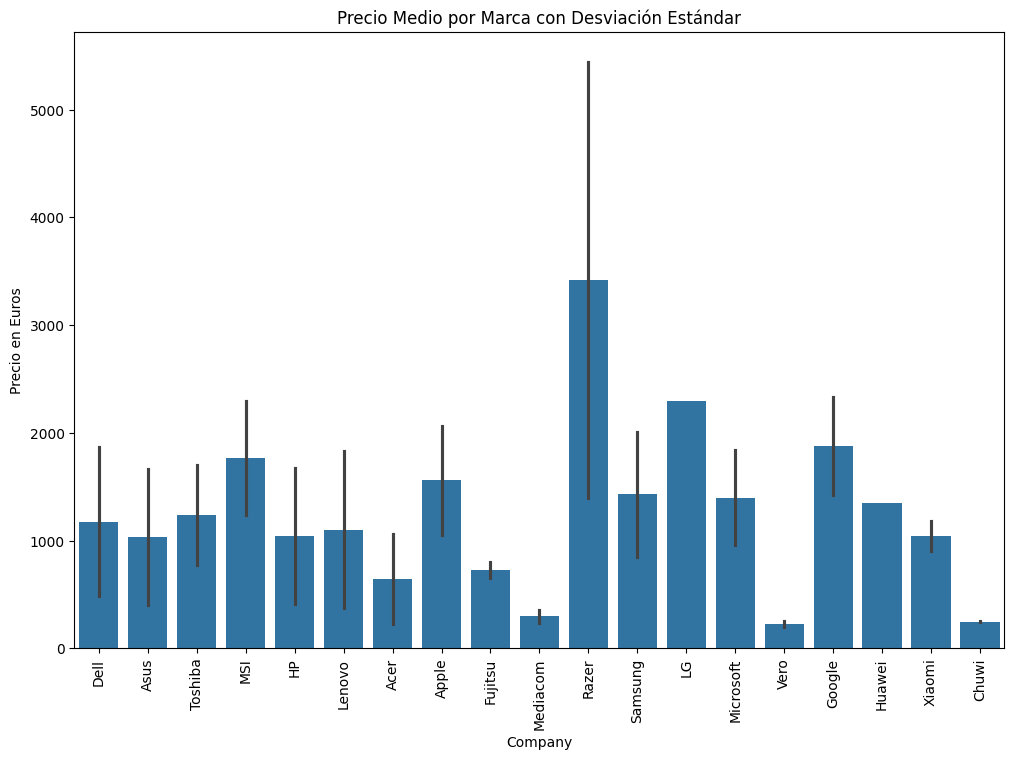

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Company', y='Price_euros', data=df, ci='sd')
plt.xticks(rotation=90)
plt.title('Precio Medio por Marca con Desviación Estándar')
plt.ylabel('Precio en Euros')
plt.show()

> Vemos que no todos tienen la misma media ni la misma desviación típica. Esto puede hacernos pensar muy fácilmente que la marca está relacionada directamente con el precio. Dado que buscamos ser lo más imparciales posible, no podemos dar por verdad nada, porque puede ser que el precio dependa de las características, y la marca esté relacionada con las características. De momento, no eliminaremos la marca.

## 4ª columna: "Product".

In [12]:
df['Product'].value_counts()

Product
Inspiron 3567                                    21
XPS 13                                           20
250 G6                                           19
Vostro 3568                                      16
Inspiron 5570                                    11
Legion Y520-15IKBN                               11
ProBook 450                                      11
Inspiron 5567                                    10
Inspiron 7567                                    10
Satellite Pro                                    10
Aspire 3                                         10
Alienware 17                                     10
EliteBook 840                                     9
ThinkPad X1                                       9
XPS 15                                            8
MacBook Pro                                       8
EliteBook 850                                     8
Vostro 5568                                       7
ProBook 470                                       7
Idea

> Vemos que hay entradas , veamos esto.

In [13]:
df_producto = df.loc[df['Product'] == 'Inspiron 3567'] 
df_producto.head(5)

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
46,1047,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,418.64
161,1023,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90
262,1238,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,AMD Radeon R5 M430,Linux,2.3kg,598.90
320,929,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
363,890,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.14kg,539.95


>Se ha hecho lo mismo con otros modelos repetidos (Sin informacion entre parentesis en la columuna 'Product'). Para evitar que se alargue demasiado, se han eliminado al comprobar que se trata de ordenadores distintos.

In [14]:
#df[df['Product'].str.contains(r'\(')] #Lo comentamos, ya lo hemos visto.


>Vimos que algunas entradas de esta columna tienen información entre paréntesis y ademas estan repetidos, veamos si se trata de ordenadores repetidos y lo podemos eliminar. 


In [15]:
df_producto_x = df.loc[df['Product'] == 'X553SA-XX031T (N3050/4GB/500GB/W10)'] 
df_producto_x

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
88,1083,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0
271,72,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0
315,546,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


>Son el mismo, eliminamos repetidos.

In [16]:
#indices_a_eliminar = [271, 315]
#df = df.drop(indices_a_eliminar)

In [17]:
df_producto_a = df.loc[df['Product'] == '15-AC110nv (i7-6500U/6GB/1TB/Radeon'] 
df_producto_a

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
714,1132,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
906,241,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0


>Son el mismo, eliminamos repetidos.

In [18]:
#indices_a_eliminar = [906]
#df = df.drop(indices_a_eliminar)

In [19]:
df_producto_p = df.loc[df['Product'] == 'Pixelbook (Core'] 
df_producto_p

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
384,1103,Google,Pixelbook (Core,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,1559.0
675,812,Google,Pixelbook (Core,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i7 7Y75 1.3GHz,16GB,512GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,2199.0


>No son iguales, así que no eliminaremos ninguno de los dos. Sin embargo, al final de esta limpieza, como paso final, eliminaremos el paréntesis.







In [20]:
df_producto_ax = df.loc[df['Product'] == 'X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce'] 
df_producto_ax

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
636,997,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
868,228,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32


>Son el mismo, eliminamos repetidos.

In [21]:
#indices_a_eliminar = [868]
#df = df.drop(indices_a_eliminar)

### Como comprobación, eliminaremos las columnas de ID y veremos si hay filas repetidas.

In [22]:
df_aux = df.drop(columns=['id']) 
columnas_duplicadas = df_aux.columns[df_aux.columns.duplicated()]
columnas_duplicadas


Index([], dtype='object')

### Ahora eliminemos los paréntesis.

In [23]:
df['Product'] = df['Product'].str.split('(').str.get(0)


### Veamos si podemos simplificar aun más.

In [24]:
#df['Product'].value_counts() #lo comento para no hacer demasido largo esto.

In [25]:
df['Modelo'] = df['Product'].apply(lambda x: x.split(' ')[0])
df['Submodelo'] = df['Product'].apply(lambda x: ' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else None)

In [26]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'HP', pasamos a la siguiente fila
    if row['Company'] != 'HP':
        continue
# Si la entrada en la columna 'Company' es 'HP' y la entrada en la columna 'Product' comienza con dos caracteres numéricos seguidos de '-', procesamos
    if row['Product'][:2].isdigit() and '-' in row['Product']:
        # Dividimos la entrada en la columna 'Product' en dos partes en el primer '-'
        parts = row['Product'].split('-', 1)
        # Asignamos los dos primeros caracteres numéricos a 'Modelo' y el resto a 'Submodelo'
        df.at[index, 'Modelo'] = parts[0][:2]
        df.at[index, 'Submodelo'] = parts[1]
    else:
        # Si no cumple las condiciones anteriores, no hacemos ningún cambio en esa fila
        continue


In [27]:
for index, row in df.iterrows():
    
    if row['Company'] != 'Lenovo':
        continue
# Si la entrada en la columna 'Company' es 'HP' y la entrada en la columna 'Product' comienza con dos caracteres numéricos seguidos de '-', procesamos
    if row['Product'][:2].isdigit() and '-' in row['Product']:
        # Dividimos la entrada en la columna 'Product' en dos partes en el primer '-'
        parts = row['Product'].split('-', 1)
        # Asignamos los dos primeros caracteres numéricos a 'Modelo' y el resto a 'Submodelo'
        df.at[index, 'Modelo'] = parts[0][:2]
        df.at[index, 'Submodelo'] = parts[1]
    else:
        # Si no cumple las condiciones anteriores, no hacemos ningún cambio en esa fila
        continue

In [28]:
asus_row = df[(df['Company'] == 'Asus') & (df['Product'] == 'A541NA-GO342 ')].index 

# Si encontramos la fila de Asus con ese producto, asignamos los valores correspondientes a Modelo y Submodelo
if not asus_row.empty:
    df.at[asus_row[0], 'Modelo'] = 'A541NA'
    df.at[asus_row[0], 'Submodelo'] = 'GO342'

In [29]:
df.at[515, 'Modelo'] = 'C740'
df.at[515, 'Submodelo'] = 'C9QX'

In [30]:
df.at[863, 'Modelo'] = 'TMX349'
df.at[863, 'Submodelo'] = 'G2-M-50FS'

In [31]:
df.at[596, 'Submodelo'] = 'Sin_submodelo'

In [32]:
df.at[180, 'Modelo'] = 'SP714'
df.at[180, 'Submodelo'] = '51'

In [33]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Lenovo', pasamos a la siguiente fila
    if row['Company'] != 'Lenovo':
        continue
    
    # Si la entrada en la columna 'Product' comienza con 'B51' seguido de '-', procesamos
    if row['Product'].startswith('B51-'):
        # Dividimos la entrada en la columna 'Product' en dos partes en el primer '-'
        parts = row['Product'].split('-', 1)
        # Asignamos lo que está antes del '-' a 'Modelo' y lo que está después del '-' a 'Submodelo'
        df.at[index, 'Modelo'] = parts[0]
        df.at[index, 'Submodelo'] = parts[1]
    else:
        # Si no cumple las condiciones anteriores, no hacemos ningún cambio en esa fila
        continue

In [34]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Asus', pasamos a la siguiente fila
    if row['Company'] != 'Asus':
        continue
    
    # Dividimos la entrada en la columna 'Product' en dos partes en el primer '-'
    parts = row['Product'].split('-', 1)
    
    # Verificamos si la lista parts tiene al menos dos elementos
    if len(parts) >= 2:
        # Asignamos la primera parte como 'Modelo' y la segunda parte como 'Submodelo'
        df.at[index, 'Modelo'] = parts[0]
        df.at[index, 'Submodelo'] = parts[1]
    else:
        # Si no hay suficientes partes, asignamos toda la entrada a 'Modelo' y dejamos 'Submodelo' como None
        df.at[index, 'Modelo'] = row['Product']
        df.at[index, 'Submodelo'] = None

In [35]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Lenovo', pasamos a la siguiente fila
    if row['Company'] != 'Lenovo':
        continue
    
    # Dividimos la entrada en la columna 'Product' en dos partes en el primer '-'
    parts = row['Product'].split('-', 1)
    
    # Verificamos si la lista parts tiene al menos dos elementos
    if len(parts) >= 2:
        # Asignamos la primera parte como 'Modelo' y la segunda parte como 'Submodelo'
        df.at[index, 'Modelo'] = parts[0]
        df.at[index, 'Submodelo'] = parts[1]
    else:
        # Si no hay suficientes partes, asignamos toda la entrada a 'Modelo' y dejamos 'Submodelo' como None
        df.at[index, 'Modelo'] = row['Product']
        df.at[index, 'Submodelo'] = None

In [36]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Lenovo', pasamos a la siguiente fila
    if row['Company'] != 'Lenovo':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'ThinkPad'
    if 'ThinkPad' in row['Product']:
        # Dividimos la entrada en la columna 'Product' en dos partes en el primer 'ThinkPad'
        parts = row['Product'].split('ThinkPad', 1)
        
        # Asignamos 'ThinkPad' a 'Modelo' y lo que está después de 'ThinkPad' a 'Submodelo'
        df.at[index, 'Modelo'] = 'ThinkPad'
        df.at[index, 'Submodelo'] = parts[1].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    else:
        # Si 'ThinkPad' no está en la entrada, no hacemos ningún cambio en esa fila
        continue

In [37]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Asus', pasamos a la siguiente fila
    if row['Company'] != 'Asus':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'VivoBook'
    if 'VivoBook' in row['Product']:
        # Dividimos la entrada en la columna 'Product' en dos partes en el primer 'VivoBook'
        parts = row['Product'].split('VivoBook', 1)
        
        # Asignamos 'VivoBook' a 'Modelo' y lo que está después de 'VivoBook' a 'Submodelo'
        df.at[index, 'Modelo'] = 'VivoBook'
        df.at[index, 'Submodelo'] = parts[1].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    else:
        # Si 'VivoBook' no está en la entrada, no hacemos ningún cambio en esa fila
        continue

In [38]:
# Iteramos sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Asus', pasamos a la siguiente fila
    if row['Company'] != 'Asus':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'Zenbook'
    if 'ZenBook' in row['Product']:
        # Asignamos 'ZenBook' a 'Modelo'
        df.at[index, 'Modelo'] = 'ZenBook'
        # Asignamos el resto de la entrada en 'Product' a 'Submodelo'
        df.at[index, 'Submodelo'] = row['Product'].split('ZenBook', 1)[1].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    elif 'Zenbook' in row['Product']:
        # Asignamos 'Zenbook' a 'Modelo'
        df.at[index, 'Modelo'] = 'Zenbook'
        # Asignamos el resto de la entrada en 'Product' a 'Submodelo'
        df.at[index, 'Submodelo'] = row['Product'].split('Zenbook', 1)[1].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    else:
        # Si 'Zenbook' no está en la entrada, no hacemos ningún cambio en esa fila
        continue


In [39]:
# Iteramos sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Lenovo', pasamos a la siguiente fila
    if row['Company'] != 'Lenovo':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'Yoga' pero no 'ThinkPad'
    if 'Yoga' in row['Product'] and 'ThinkPad' not in row['Product']:
        # Asignamos 'Yoga' a 'Modelo'
        df.at[index, 'Modelo'] = 'Yoga'
        # Asignamos el resto de la entrada en 'Product' a 'Submodelo'
        df.at[index, 'Submodelo'] = row['Product'].split('Yoga', 1)[1].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    else:
        # Si 'Yoga' no está en la entrada o si 'ThinkPad' está presente, no hacemos ningún cambio en esa fila
        continue


In [40]:
# Iteramos sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Lenovo', pasamos a la siguiente fila
    if row['Company'] != 'Lenovo':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'Legion'
    if 'Legion' in row['Product']:
        # Asignamos 'legion' a 'Modelo' (en minúsculas)
        df.at[index, 'Modelo'] = 'legion'
        # Asignamos el resto de la entrada en 'Product' a 'Submodelo'
        df.at[index, 'Submodelo'] = row['Product'].split('Legion', 1)[1].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    else:
        # Si 'Legion' no está en la entrada, no hacemos ningún cambio en esa fila
        continue


In [41]:
df.at[538, 'Modelo'] = 'Vivobook'
df.at[538, 'Submodelo'] = 'E200HA'
df.at[564, 'Modelo'] = 'Vivobook'
df.at[564, 'Submodelo'] = 'Max'
df.at[264, 'Modelo'] = 'Chromebook'
df.at[264, 'Submodelo'] = 'Flip'
df.at[566, 'Modelo'] = 'Chromebook'
df.at[566, 'Submodelo'] = 'Flip'
df.at[354, 'Modelo'] = 'Chromebook'
df.at[354, 'Submodelo'] = 'N23'
df.at[437, 'Modelo'] = 'Flex'
df.at[437, 'Submodelo'] = '5'
df.at[277, 'Modelo'] = 'Thinkpad'
df.at[277, 'Submodelo'] = 'Yoga'
df.at[393, 'Modelo'] = 'Thinkpad'
df.at[393, 'Submodelo'] = 'Yoga'
df.at[64, 'Submodelo'] = 'Sin_submodelo'
df.at[357, 'Submodelo'] = 'Sin_submodelo'
df.at[489, 'Submodelo'] = 'Sin_submodelo'
df.at[675, 'Submodelo'] = 'Sin_submodelo'
df.at[384, 'Submodelo'] = 'Sin_submodelo' 
df.at[150, 'Modelo'] = 'ZenBook'
df.at[15, 'Submodelo'] = 'GV350T'

In [42]:
df.replace(to_replace="Portégé", value="Portege", inplace=True)

In [43]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Asus', pasamos a la siguiente fila
    if row['Company'] != 'Asus':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'Rog' o 'ROG'
    if 'Rog' in row['Product'] or 'ROG' in row['Product']:
        # Asignamos 'Rog' o 'ROG' a 'Modelo' según la entrada en 'Product'
        if 'Rog' in row['Product']:
            df.at[index, 'Modelo'] = 'Rog'
        else:
            df.at[index, 'Modelo'] = 'ROG'
        # Asignamos el resto de la entrada en 'Product' a 'Submodelo'
        submodelo_index = max(row['Product'].find('Rog'), row['Product'].find('ROG')) + len('Rog')  # Encuentra la última ocurrencia de 'Rog' o 'ROG'
        df.at[index, 'Submodelo'] = row['Product'][submodelo_index:].strip()  # Elimina los espacios en blanco alrededor de la cadena
    else:
        # Si 'Rog' o 'ROG' no están en la entrada, no hacemos ningún cambio en esa fila
        continue

In [44]:
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Lenovo', pasamos a la siguiente fila
    if row['Company'] != 'Lenovo':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'Thinkpad' y no contiene 'Yoga'
    if 'Thinkpad' in row['Product'] and 'Yoga' not in row['Product']:
        # Asignamos 'Thinkpad' a 'Modelo'
        df.at[index, 'Modelo'] = 'Thinkpad'
        # Asignamos el resto de la entrada en 'Product' a 'Submodelo'
        submodelo_index = row['Product'].find('Thinkpad') + len('Thinkpad')
        df.at[index, 'Submodelo'] = row['Product'][submodelo_index:].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    else:
        # Si 'Thinkpad' no está en la entrada o si 'Yoga' está presente, no hacemos ningún cambio en esa fila
        continue

In [45]:
# Iteramos sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Si la entrada en la columna 'Company' no es 'Lenovo', pasamos a la siguiente fila
    if row['Company'] != 'Lenovo':
        continue
    
    # Verificamos si la entrada en la columna 'Product' contiene 'IdeaPad'
    if 'IdeaPad' in row['Product']:
        # Asignamos 'IdeaPad' a 'Modelo'
        df.at[index, 'Modelo'] = 'IdeaPad'
        # Asignamos el resto de la entrada en 'Product' a 'Submodelo'
        submodelo_index = row['Product'].find('IdeaPad') + len('IdeaPad')
        df.at[index, 'Submodelo'] = row['Product'][submodelo_index:].strip()  # Eliminamos los espacios en blanco alrededor de la cadena
    else:
        # Si 'IdeaPad' no está en la entrada, no hacemos ningún cambio en esa fila
        continue


In [46]:
df['Submodelo'].fillna('Sin_submodelo', inplace=True)
df['Submodelo'].replace('none', 'Sin_submodelo', inplace=True)
df['Submodelo'].replace(' ', 'Sin_submodelo', inplace=True) 
df['Submodelo'] = df['Submodelo'].apply(lambda x: 'Sin_submodelo' if pd.isna(x) or x.lower() == 'none' else x)

In [47]:
df.replace(to_replace="Rog", value="ROG", inplace=True)

In [48]:
for index, row in df.iterrows():
    # Buscar la cadena "Ideapad" en la columna "Modelo"
    if 'Ideapad' in row['Modelo']:
        # Separar "Ideapad" del submodelo
        partes = row['Modelo'].split(' ', 1)
        # Dejar "Ideapad" en la columna "Modelo"
        df.at[index, 'Modelo'] = partes[0]
        # Poner el submodelo en la columna "Submodelo"
        if len(partes) > 1:
            df.at[index, 'Submodelo'] = partes[1]


In [49]:
df.at[373, 'Modelo'] = 'Zenbook'
df.at[373, 'Submodelo'] = 'CN269T' 

df.at[191, 'Modelo'] = 'VivoBook'
df.at[191, 'Submodelo'] = 'X542UQ-DM117' 

df.at[222, 'Modelo'] = 'VivoBook'
df.at[222, 'Submodelo'] = '17 X705' 

df.at[223, 'Modelo'] = 'Phantom'
df.at[223, 'Submodelo'] = 'Pro' 

df.at[232, 'Modelo'] = 'Leopard'
df.at[232, 'Submodelo'] = 'Pro' 

df.at[190, 'Modelo'] = 'ROG'
df.at[190, 'Submodelo'] = 'FX502VM' 

df.at[295, 'Modelo'] = 'flip'
df.at[295, 'Submodelo'] = 'Sin_submodelo' 

df.at[330, 'Modelo'] = 'VivoBook'
df.at[330, 'Submodelo'] = 'X751NV-TY001' 

df.at[366, 'Modelo'] = 'Leopard'
df.at[366, 'Submodelo'] = 'GP62' 

df.at[180, 'Modelo'] = 'Spin'
df.at[180, 'Submodelo'] = 'SP714-51' 

df.at[620, 'Modelo'] = 'Phantom'
df.at[620, 'Submodelo'] = 'GS40' 

df.at[636, 'Modelo'] = 'Vivobook'
df.at[636, 'Submodelo'] = 'X556UJ' 

df.at[631, 'Modelo'] = 'Stealth'
df.at[631, 'Submodelo'] = 'Pro' 

df.at[555, 'Modelo'] = 'ROG'
df.at[555, 'Submodelo'] = 'G752VY' 

df.at[544, 'Modelo'] = 'Ghost'
df.at[544, 'Submodelo'] = 'GS60' 

df.at[543, 'Modelo'] = 'VivoBook'
df.at[543, 'Submodelo'] = 'X541UV' 

df.at[10, 'Modelo'] = 'Vivobook'
df.at[10, 'Submodelo'] = 'X540SA' 

df.at[600, 'Modelo'] = 'Vivobook'
df.at[600, 'Submodelo'] = 'X540SA' 

df.at[8, 'Modelo'] = 'Zenbook'
df.at[8, 'Submodelo'] = 'UX430UQ' 

df.at[667, 'Modelo'] = 'Pavilion'
df.at[667, 'Submodelo'] = 'Sin_submodelo' 

df.at[687, 'Modelo'] = 'Apache'
df.at[687, 'Submodelo'] = 'Pro' 

df.at[788, 'Modelo'] = 'Apache'
df.at[788, 'Submodelo'] = 'Pro' 

df.at[796, 'Modelo'] = 'Lapbook'
 


df.at[811, 'Modelo'] = 'Zenbook'
df.at[811, 'Submodelo'] = 'UX410UA' 


df.at[839, 'Modelo'] = 'Stealth'
df.at[839, 'Submodelo'] = 'Pro' 

df.at[863, 'Modelo'] = 'Travelmate'

df.at[544, 'Submodelo'] = 'Pro GS60' 

df.at[884, 'Modelo'] = 'Vivobook'
df.at[884, 'Submodelo'] = 'X505BP' 

df.at[528, 'Modelo'] = 'Vivobook'
df.at[528, 'Submodelo'] = 'R417NA-RS01' 

df.at[515, 'Modelo'] = 'Chromebook'
df.at[515, 'Submodelo'] = 'C740-C9QX' 

df.at[168, 'Modelo'] = 'GE73VR'
df.at[168, 'Submodelo'] = 'Raider' 

df.at[110, 'Modelo'] = 'Apache'
df.at[110, 'Submodelo'] = 'Pro' 

df.at[183, 'Modelo'] = 'Leopard'
df.at[183, 'Submodelo'] = 'Pro' 


df.at[104, 'Submodelo'] = 'Titan' 

df.at[31, 'Modelo'] = 'rog'
df.at[31, 'Submodelo'] = 'GL553VE' 

df.at[440, 'Modelo'] = 'Leopard'
df.at[440, 'Submodelo'] = 'Pro' 

df.at[449, 'Modelo'] = 'Leopard'
df.at[449, 'Submodelo'] = 'Pro' 







In [50]:
filtered_df = df[df['Product'] == 'portégé z30-c-188']

# Selecciona solo las columnas 'Company', 'Product', 'Modelo' y 'Submodelo'
selected_columns_df = filtered_df[['TypeName','Company', 'Product', 'Modelo', 'Submodelo']]

selected_columns_df

,TypeName,Company,Product,Modelo,Submodelo


In [124]:
#df[['Company','Product', 'Modelo', 'Submodelo']].sort_values(by='Modelo') #Lo comentamos para que no se haga tan largo

Lo pondremos todo en minusculas.

In [52]:
df['Product'] = df['Product'].str.lower()
df['Modelo'] = df['Modelo'].str.lower()
df['Submodelo'] = df['Submodelo'].str.lower()

In [127]:
df['Modelo'].value_counts()

Modelo
inspiron       99
thinkpad       72
ideapad        69
probook        51
aspire         46
elitebook      39
latitude       35
xps            28
rog            28
vostro         27
15             25
yoga           25
vivobook       22
zenbook        22
250            21
macbook        17
chromebook     16
tecra          14
legion         13
portege        13
alienware      12
satellite      10
zbook          10
v110           10
pavilion        9
v310            7
swift           7
17              7
omen            7
leopard         6
spectre         6
smartbook       6
blade           6
precision       6
notebook        5
envy            5
spin            4
travelmate      4
gl62m           4
stream          4
x541na          4
pro p2540ua     4
x553sa          4
apache          3
v330            3
x541na          3
mi              3
lifebook        3
predator        3
b51             3
surface         3
pixelbook       2
gs73vr          2
fx553vd         2
fx753ve         2
pha

In [126]:
df[df['Submodelo'] == 'msi']

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price_euros,Modelo,Submodelo,Resolucion_X,Resolucion_Y,Tactil,PANEL IPS,Retina Display,Definicion,Marca_Cpu,Potencia_Cpu(GHz),Modelo_Cpu,Submodelo_Cpu,Memoria_Principal(GB),Tipo_mem_principal,Memoria_Secundario(GB),Tipo_mem_secundario,Marca_Gpu,Modelo_Gpu,Submodelo_Gpu
270,308,MSI,laptop msi,Gaming,17.3,Full HD 1920x1080,intel core i7 6820hk 2.7ghz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.14,2199.0,laptop,msi,1920,1080,False,False,False,Full HD,intel,2.7,core,i7 6820hk,128.0,SSD,1000.0,HDD,Nvidia,geforce,gtx 970m


## 5ª columna: "TypeName".

In [54]:
df['TypeName'].value_counts()

TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

> Vemos que no hay tipos de ordenador repetidos pero escritos de forma diferente.   
'Netbook' pensé que era 'notebook' pero mal escrito, pero existen.   
De momento no requiere ningún cambio, más adelante la convertiremos en numérico.  

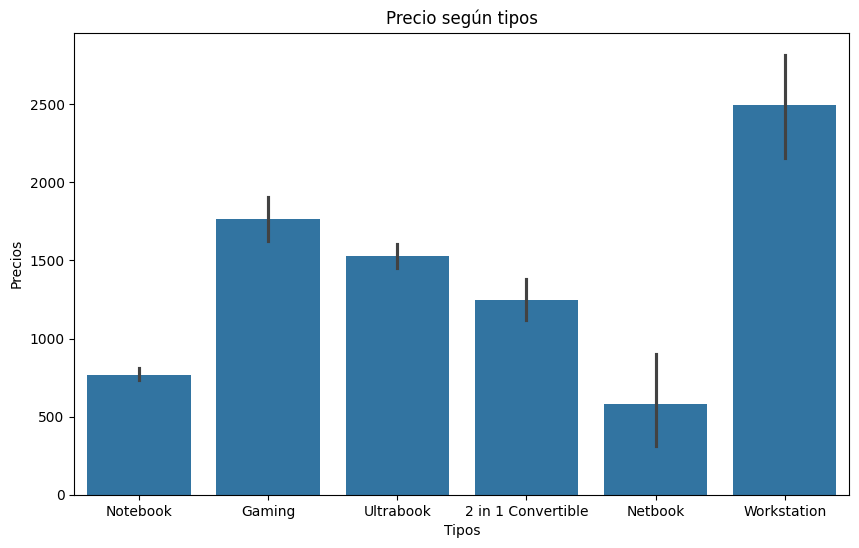

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TypeName', y='Price_euros', data=df)
plt.title('Precio según tipos')
plt.xlabel('Tipos')
plt.ylabel('Precios')
plt.show()

In [56]:
anova_result = stats.f_oneway(*[df['Price_euros'][df['TypeName'] == category] for category in df['TypeName'].unique()])

# Imprimir el resultado
print("Resultado del ANOVA:")
print(anova_result)

Resultado del ANOVA:
F_onewayResult(statistic=118.29991637097596, pvalue=2.496534706156228e-96)


> Viendo la gráfica, observamos que hay diferencias, aunque como hemos dicho antes, puede que las diferencias no dependan directamente del tipo de ordenador del que se trate y dependan más de otras características (como los componentes).
Esto se refuerza con los resultados de la prueba ANOVA. Vemos que en network y workstation la desviación típica es más grande que en los demás.
No eliminaremos, al menos por el momento, dicha columna, ya que puede ser de utilidad para el modelo predictivo.







## 6ª columna: "'Inches'".

In [57]:
#df['Inches'].value_counts()

> Ya están en numéricas, además no tiene nada que parezca que necesite ser arreglado, veamos si hay relacion.

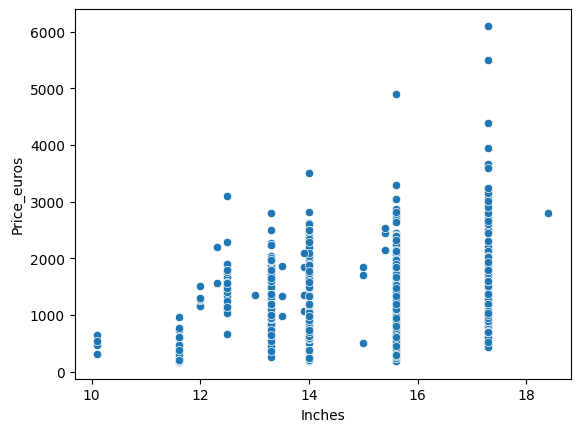

La correlación entre las pulgadas de la pantalla, en la columna Inches', y  el precio en la columna 'Price_euros' es 0.07779808279053775


In [58]:
sns.scatterplot(data=df, x='Inches', y='Price_euros')
plt.show()


correlacion = df['Inches'].corr(df['Price_euros'])
print("La correlación entre las pulgadas de la pantalla, en la columna Inches', y  el precio en la columna 'Price_euros' es", correlacion)

> Vemos que la gráfica 'hace una cuesta' hacia arriba, o sea, que se ve que los ordenadores más caros de más pulgadas,  
son más caros que los ordenadores más caros con menos pulgadas, pero la correlación es pequeña. Puede que lo que hace  
caro no sea el tamaño en sí, sino que los ordenadores más grandes tengan, por regla general, componentes más caros.

## 7ª columna: "ScreenResolution".

In [59]:
#df['ScreenResolution'].value_counts()

> La columna 'ScreenResolution' tiene mucha información, por lo que la iremos dividiendo en distintas columnas.

In [60]:
df['Resolucion'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})') #Con esto creamos una columna con la resolución.

In [61]:
#df['Resolucion'].value_counts()

Dividiremos en dos la columna "Resolución" y la haremos numérica.

In [62]:
df[['Resolucion_X', 'Resolucion_Y']] = df['Resolucion'].str.split('x', expand=True)

# Convertimos las nuevas columnas en valores numéricos
df['Resolucion_X'] = pd.to_numeric(df['Resolucion_X'])
df['Resolucion_Y'] = pd.to_numeric(df['Resolucion_Y'])


In [63]:
df['Tactil'] = False #Se crea una columna con tadas las entradas a 0, o sea... false.
df.loc[df['ScreenResolution'].str.contains('touchscreen', case=False), 'Tactil'] = True #Si en la columna ScreenResolution aparece 'touchscreen' se cambiara a True, o sea, verdadero

In [64]:
df['PANEL IPS'] = False #Se crea una columna con tadas las entradas a 0, o sea... false.
df.loc[df['ScreenResolution'].str.contains('IPS Panel', case=False), 'PANEL IPS'] = True #Si en la columna ScreenResolution aparece 'IPS Panel' se cambiara a 1, o sea, verdadero

In [65]:
df['Retina Display'] = False #Se crea una columna con tadas las entradas a 0, o sea... false.
df.loc[df['ScreenResolution'].str.contains('Retina Display', case=False), 'Retina Display'] = True #Si en la columna ScreenResolution aparece 'Quad HD+' se cambiara a 1, o sea, verdadero

> Sabemos que hay 17 entradas de la marca Apple. La pantalla 'Retina' es de Apple.  
Si hay 17, podemos eliminarla, puesto que esta información ya aparece en la columna marca.

In [66]:
df['Retina Display'].value_counts()

Retina Display
False    898
True      14
Name: count, dtype: int64

> Hay 3 ordenadores Apple sin pantalla Retina, por lo que no podemos eliminarla.

In [67]:
df['Full HD'] = 0 #Se crea una columna con tadas las entradas a 0, o sea... false.
df.loc[df['ScreenResolution'].str.contains('Full HD', case=False), 'Full HD'] = 1 #Si en la columna ScreenResolution aparece 'Full HD' se cambiara a 1, o sea, verdadero

In [68]:
df['4K Ultra HD'] = 0 #Se crea una columna con tadas las entradas a 0, o sea... false.
df.loc[df['ScreenResolution'].str.contains('4K Ultra HD', case=False), '4K Ultra HD'] = 1 #Si en la columna ScreenResolution aparece '4K Ultra HD' se cambiara a 1, o sea, verdadero

In [69]:
df['Quad HD+'] = 0 #Se crea una columna con tadas las entradas a 0, o sea... false.
df.loc[df['ScreenResolution'].str.contains('Quad HD+', case=False), 'Quad HD+'] = 1 #Si en la columna ScreenResolution aparece 'Quad HD+' se cambiara a 1, o sea, verdadero

Ahora crearemos una columna "Definicion" que diga "Full HD" , "4K Ultra HD" o "Quad HD+" y despues eliminaremos las 3 anteriores.

In [70]:
df['Definicion'] = ''
df.loc[df['Full HD'] == 1, 'Definicion'] = 'Full HD'
df.loc[df['4K Ultra HD'] == 1, 'Definicion'] = '4K Ultra HD'
df.loc[df['Quad HD+'] == 1, 'Definicion'] = 'Quad HD+'
df['Definicion'] = df['Definicion'].replace('', 'No especificado')


In [71]:
#df['Definicion'].value_counts()

La definicion (Full HD, 4k...) depende de la resolucion, vemaos si podemos eliminar la columna definicion.

In [72]:
df_full_hd = df[df['Definicion'] == 'Full HD'] 
df_full_hd['Resolucion'].value_counts()

Resolucion
1920x1080    579
2160x1440      1
1920x1200      1
Name: count, dtype: int64

Esto puede ser un poco problematico, segun chatgtp full hd es solo 1920x1080

In [73]:
df_full_hd.loc[df_full_hd['Resolucion'].isin(['1920x1200', '2160x1440'])]

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Modelo,Submodelo,Resolucion,Resolucion_X,Resolucion_Y,Tactil,PANEL IPS,Retina Display,Full HD,4K Ultra HD,Quad HD+,Definicion
420,755,Huawei,matebook x,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,1349.0,matebook,x,2160x1440,2160,1440,False,True,False,1,0,0,Full HD
822,430,Mediacom,smartbook 142,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4GB,32GB HDD,Intel HD Graphics 400,Windows 10,1.4kg,265.0,smartbook,142,1920x1200,1920,1200,False,True,False,1,0,0,Full HD


In [74]:
kkkk= df[df['Definicion'] == '4K Ultra HD'] 
kkkk['Resolucion'].value_counts()

Resolucion
3840x2160    34
Name: count, dtype: int64

> Esto es bueno.

In [75]:
quad= df[df['Definicion'] == 'Quad HD+'] 
quad['Resolucion'].value_counts()

Resolucion
3200x1800    15
2560x1440     1
Name: count, dtype: int64

>Segun chaty ambos pueden ser Quad HD+

Ya podemos eliminar las columnas  las columnas temporales que creamos.

In [76]:
df.drop(columns=['Resolucion', 'Full HD', '4K Ultra HD', 'Quad HD+'], inplace=True) 



## 8ª columna: "Cpu".

In [77]:
#df['Cpu'].value_counts()

Al igual que hicimos con la columna 'ScreenResolution', dividiremos la información de la columna *'Cpu'* en distintas columnas.

In [78]:
#Primero la marca
df['Marca_Cpu'] = 'nisu'  # Por defecto la marca será 'nisu'

df.loc[df['Cpu'].str.contains('Intel'), 'Marca_Cpu'] = 'Intel'
df.loc[df['Cpu'].str.contains('AMD'), 'Marca_Cpu'] = 'AMD'



In [79]:
df['Cpu'] = df['Cpu'].str.replace('.0GHz', 'GHz') 
 
df['Cpu'] = df['Cpu'].str.replace('Intel Core i5 7200U 2.70GHz', 'Intel Core i5 7200U 2.7GHz') 

df['Cpu'] = df['Cpu'].str.replace('Intel Celeron Dual Core N3060 1.60GHz', 'Intel Celeron Dual Core N3060 1.6GHz') 

df['Cpu'] = df['Cpu'].str.replace('Intel Core i7 6500U 2.50GHz', 'Intel Core i7 6500U 2.5GHz') 

df['Cpu'] = df['Cpu'].str.replace('Intel Core i5 7200U 2.50GHz', 'Intel Core i5 7200U 2.5GHz') 


df['Cpu'] = df['Cpu'].str.replace('Atom X5-Z8350', 'Atom x5-Z8350') 
df['Cpu'] = df['Cpu'].str.replace('Atom Z8350', 'Atom x5-Z8350') 
df['Cpu'] = df['Cpu'].str.replace('A6-Series A6-9220', 'A6-Series 9220') 
df['Cpu'] = df['Cpu'].str.replace('A9-Series A9-9420', 'A9-Series 9420') 
df['Cpu'] = df['Cpu'].str.replace('E-Series 9000', 'E-Series E2-9000') 

df['Cpu'] = df['Cpu'].str.replace('AMD A10-Series A10-9620P 2.5GHz', 'AMD A10-Series 9620P 2.5GHz')

In [80]:
#Ahora La velocidad.
df['Potencia_Cpu(GHz)'] = 'nisu' 
df['Potencia_Cpu(GHz)'] = df['Cpu'].str.extract(r'(\d+\.*\d*)\s*GHz')
df['Potencia_Cpu(GHz)'] = df['Potencia_Cpu(GHz)'].astype(float)
#df['Potencia_Cpu(GHz)'].value_counts() 

In [81]:
df['modelocpu_temporal'] = df['Cpu'].apply(lambda x: ' '.join(x.replace('AMD', '').replace('Intel', '').split()[:-1]) if 'GHz' in x else x) #esto es temporal, para facilitar las cosas
df[['Modelo_Cpu', 'Submodelo_Cpu']] = df['modelocpu_temporal'].str.split(n=1, expand=True)

In [82]:
df[['Modelo_Cpu', 'Submodelo_Cpu']] = df['modelocpu_temporal'].str.split(n=1, expand=True)

In [83]:
#df[['Cpu','modelocpu_temporal','Marca_Cpu','Modelo_Cpu', 'Submodelo_Cpu','Potencia_Cpu(GHz)']].sort_values(by='modelocpu_temporal')

Tambien las pondremos en minusculas.

In [84]:
df['Cpu'] = df['Cpu'].str.lower()
df['Marca_Cpu'] = df['Marca_Cpu'].str.lower()
df['Modelo_Cpu'] = df['Modelo_Cpu'].str.lower()
df['Submodelo_Cpu'] = df['Submodelo_Cpu'].str.lower()


In [85]:
#df[['Cpu','Marca_Cpu','Modelo_Cpu', 'Submodelo_Cpu','Potencia_Cpu(GHz)']].sort_values(by='Marca_Cpu')

In [86]:
#df['Submodelo_Cpu'].value_counts() 

La columna 'modelocpu_temporal' ya ha cumplido su función, nos sirvió de gran ayuda... pero ya no la necesitamos, de hecho nos estorba, y como no tenemos sentimiento de apego con ella, pues al cielo con ella.

In [87]:
df.drop(columns=['modelocpu_temporal'], inplace=True) 



## 9ª columna: "Ram".

In [88]:
df['Ram'].value_counts()

Ram
8GB     434
4GB     274
16GB    125
6GB      32
2GB      16
12GB     15
32GB     14
24GB      2
Name: count, dtype: int64

> Para pasarlo a numérico necesitamos eliminar 'GB'.

In [89]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = pd.to_numeric(df['Ram'])
df = df.rename(columns={'Ram': 'Ram (GB)'})

In [90]:
df['Ram (GB)'].value_counts()

Ram (GB)
8     434
4     274
16    125
6      32
2      16
12     15
32     14
24      2
Name: count, dtype: int64

> Ya está en numérica 

## 10ª columna: "Memory".

In [91]:
df['Memory'].value_counts()

Memory
256GB SSD                        293
1TB HDD                          150
500GB HDD                        100
512GB SSD                         75
128GB SSD +  1TB HDD              61
128GB SSD                         56
256GB SSD +  1TB HDD              52
32GB Flash Storage                27
64GB Flash Storage                11
2TB HDD                           11
512GB SSD +  1TB HDD              10
1TB SSD                            9
1.0TB Hybrid                       7
256GB Flash Storage                7
32GB SSD                           5
180GB SSD                          5
256GB SSD +  2TB HDD               4
16GB Flash Storage                 4
16GB SSD                           3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB Flash Storage                2
512GB SSD +  2TB HDD               2
512GB Flash Storage                2
1.0TB HDD                          1
32GB HDD                           1
128GB SSD +  2TB HDD           

Creamos una columna con los gigas del disco duro principal.

In [92]:
df['Memoria principal'] = df['Memory'].str.split().str[0] #Con esto pongo cuantos gb o tb tiene el disco duro princpial. 
df['Memoria principal'] = df['Memoria principal'].str.replace('GB', '') #Eliminamos 'GB' de las entradas donde aparece. 
df['Memoria_Principal'] = df['Memoria principal'] #Creamos una nueva columna para poder multiplicar por mil los teras.
df['Memoria_Principal'] = df['Memoria_Principal'].str.replace('TB', '') #Eliminamos 'TB' de las entradas donde aparece. 
df['Memoria_Principal'] = pd.to_numeric(df['Memoria_Principal'], errors='coerce') #Convertimos a numerico. 
df['Memoria_Principal'] = df['Memoria principal'].apply(lambda x: float(x.replace('TB', '').strip()) * 1000 if 'TB' in x else x) #Si son teras multiplicamos por mil 
df.drop(columns=['Memoria principal'], inplace=True) #Eliminamos la columna que ya no nos sirve.
df['Memoria_Principal'] = df['Memoria_Principal'].astype(float) #Convertimos a numerico.
df = df.rename(columns={'Memoria_Principal': 'Memoria_Principal(GB)'}) #cambiamos el nombre




Creamos una columna con el tipo del disco duro principal

In [93]:
df['Tipo_mem_principal'] = df['Memory'].apply(lambda x: x.split(" ")[1].strip() if "+" in x else x.split(" ", 1)[1].strip()) #Creamos una columna cone l primer tipo de memoria que sale.
df['Tipo_mem_principal'] = df['Tipo_mem_principal'].replace("Flash", "Flash Storage") #Arreglamos un pequeño fallito


In [94]:
#df['Memoria_Principal(GB)'].value_counts()

In [95]:
#df['Tipo_mem_principal'].value_counts()

Creamos una columna con los gigas que tiene el segundo disco, 0 si no tiene

In [96]:
df['Segundo disco'] = df['Memory'].apply(lambda x: x[x.find('+')+1:].split()[0] if '+' in x else 0) #Si no aparece el + se pone "0" en la columna nueva, si aparece se pone su memoria
mask = df['Segundo disco'].str.contains('GB', na=False)#Eliminamos los caracteres "GB"
df.loc[mask, 'Segundo disco'] = df.loc[mask, 'Segundo disco'].str.replace(r'(\d+)GB', r'\1', regex=True) #Eliminamos los caracteres "GB" 
df['Segundo_Disco'] = df['Segundo disco'] #CReamos una columna igual. 
mask = df['Segundo_Disco'].str.contains('TB', na=False)#Eliminamos los caracteres "TB" 
df.loc[mask, 'Segundo_Disco'] = df.loc[mask, 'Segundo_Disco'].str.replace(r'(\d+)TB', r'\1', regex=True) #Eliminamos los caracteres "TB" 
df['Segundo_Disco'] = pd.to_numeric(df['Segundo_Disco'], errors='coerce') #Convertimos a numerico. 
mask = df['Segundo disco'].str.contains('TB', na=False) #Buscamos aquellos que vienen en teras
df.loc[mask, 'Segundo_Disco'] *= 1000 #Multipicamos por 1000 
df = df.rename(columns={'Segundo_Disco': 'Memoria_Secundario(GB)'}) 
df.drop(columns=['Segundo disco'], inplace=True) 



In [97]:
#df['Memoria_Secundario(GB)'].value_counts()

Creamos una columna con el tipo del disco duro secundario.

In [98]:
df['Tipo_mem_secundario'] = 'Sin disco secundario'

mask = df['Memory'].str.contains(r'\+', na=False)

df.loc[mask, 'Tipo_mem_secundario'] = df.loc[mask, 'Memory'].str.split().str[-1]




In [99]:
#df['Tipo_mem_secundario'].value_counts()

Dejamos el codigo para liminar la columna "Memory" preparada

In [100]:
#df.drop(columns=['Memory'], inplace=True) 

## 11ª columna: "Gpu". 
>Al igual que hicimos con la columna 'Cpu' aquí también la dividiremos en otras columnas.

Primero la marca (es lo más fácil).

In [101]:
df['Marca_Gpu'] = df['Gpu'].apply(lambda x: 'Nvidia' if 'nvidia' in x.lower() else ('Intel' if 'intel' in x.lower() else ('AMD' if 'amd' in x.lower() else 'Otro')))

In [102]:
#df[['Gpu','Marca_Gpu']].sort_values(by='Gpu')

In [103]:
#Vemos que aparece 'Nvidia GeForce GTX 960<U+039C>' eso de '<U+039C>' no significa nada, asi que lo quitamos. 
df['Gpu'] = df['Gpu'].str.replace('Nvidia GeForce GTX 960<U+039C>', 'Nvidia GeForce GTX 960') 

In [104]:
#df['Marca_Gpu'].value_counts()

Ahora hagamos una columna temporal, pa' que sea más fácil sacar información... Sin la marca.

In [105]:
df['Temporal_Gpu'] = df['Gpu'].apply(lambda x: x.lower().replace('nvidia', '').replace('intel', '').replace('amd', ''))


In [106]:
#df[['Gpu','Marca_Gpu', 'Temporal_Gpu']].sort_values(by='Temporal_Gpu')

Pasándole la lista temporal a nuestro amigo Chaty, veremos si hay algunas que son la misma pero escritas de forma distinta.







In [107]:
df['Gpu'] = df['Gpu'].str.replace('hd graphics 620', 'Hd graphics 620') 
df['Gpu'] = df['Gpu'].str.replace('geforce gtx 940mx', 'geforce gtx 940MX') 

In [108]:
#df['Temporal_Gpu'].value_counts() 
#Según chatgtp parece estar bien.

Ahora si, Modelo y Submodelo.

In [109]:
# Crear las columnas Modelo_Gpu y Submodelo_Gpu
df['Modelo_Gpu'] = ''
df['Submodelo_Gpu'] = ''

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    # Dividir la cadena en palabras
    palabras = row['Temporal_Gpu'].split()
    
    # Si hay solo una palabra
    if len(palabras) == 1:
        df.at[index, 'Modelo_Gpu'] = palabras[0]
        df.at[index, 'Submodelo_Gpu'] = 'no_especificado'
    else:
        # Tomar la primera palabra como el modelo
        df.at[index, 'Modelo_Gpu'] = palabras[0]
        
        # Si la primera palabra es "hd graphics" y hay más palabras después de "hd graphics"
        if palabras[0] == 'hd' and palabras[1] == 'graphics':
            df.at[index, 'Modelo_Gpu'] = 'hd graphics'
            if len(palabras) > 2:
                df.at[index, 'Submodelo_Gpu'] = palabras[2]
            else:
                df.at[index, 'Submodelo_Gpu'] = 'no_especificado'
        elif palabras[0] == 'uhd' and palabras[1] == 'graphics':
            df.at[index, 'Modelo_Gpu'] = 'uhd graphics'
            if len(palabras) > 2:
                df.at[index, 'Submodelo_Gpu'] = palabras[2]
            else:
                df.at[index, 'Submodelo_Gpu'] = 'no_especificado'
        # Si la segunda palabra es un número, tomarla como el submodelo
        elif palabras[1].isdigit():
            df.at[index, 'Submodelo_Gpu'] = palabras[1]
        else:
            # Tomar todas las palabras restantes como el submodelo
            df.at[index, 'Submodelo_Gpu'] = ' '.join(palabras[1:])

    # Manejar casos especiales
    if row['Temporal_Gpu'] == 'r17m-m1-70':
        df.at[index, 'Modelo_Gpu'] = 'radeon'
        df.at[index, 'Submodelo_Gpu'] = 'r7 M530'
    elif 'sli' in row['Temporal_Gpu']:
        df.at[index, 'Submodelo_Gpu'] = row['Temporal_Gpu']







In [110]:
df.at[589, 'Modelo_Gpu'] = 'radeon' #no lo cambiaba bien el codigo anterior.
df.at[589, 'Submodelo_Gpu'] = 'r7 M530'


In [111]:
df.at[738, 'Modelo_Gpu'] = 'geforce' #Lo he buscado en internet
df.at[738, 'Submodelo_Gpu'] = 'gtx 980 sli' 

df.at[740, 'Modelo_Gpu'] = 'radeon' 
df.at[740, 'Submodelo_Gpu'] = 'r4'  

df.at[887, 'Modelo_Gpu'] = 'hd graphics' 
df.at[887, 'Submodelo_Gpu'] = '620'  

In [112]:
#gtx 1050ti 
df['Submodelo_Gpu'] = df['Submodelo_Gpu'].str.replace('gtx 1050ti', 'gtx 1050 ti') 

In [113]:
#df[['Gpu','Marca_Gpu', 'Modelo_Gpu','Submodelo_Gpu']].sort_values(by='Modelo_Gpu')

In [114]:
#df['Submodelo_Gpu'].value_counts()

Ahora eliminamos la temporal.

In [115]:
df.drop(columns=['Temporal_Gpu'], inplace=True)

## 12ª columna: "'OpSys'".

In [116]:
#df['OpSys'].value_counts()

## 13ª columna: "Weight".

In [117]:
#df['Weight'].value_counts()

> Para pasarlo a numérico necesitamos eliminar 'Kg'.

In [118]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = pd.to_numeric(df['Weight'])

> Ya está en numérica 

In [119]:
df = df.rename(columns={'Weight': 'Weight (Kg)'})

## 14ª columna: "Price_euros".

In [120]:
#df['Price_euros'].value_counts()

### Eliminamos las entradas unicas de Modelo.

In [128]:
#frecuencias = df['Modelo'].value_counts()

#df = df[df['Modelo'].isin(frecuencias[frecuencias > 1].index)]

In [130]:
df['Modelo'].value_counts()

Modelo
inspiron       99
thinkpad       72
ideapad        69
probook        51
aspire         46
elitebook      39
latitude       35
xps            28
rog            28
vostro         27
15             25
yoga           25
vivobook       22
zenbook        22
250            21
macbook        17
chromebook     16
tecra          14
portege        13
legion         13
alienware      12
zbook          10
v110           10
satellite      10
pavilion        9
omen            7
swift           7
v310            7
17              7
leopard         6
spectre         6
blade           6
precision       6
smartbook       6
envy            5
notebook        5
pro p2540ua     4
x541na          4
gl62m           4
stream          4
x553sa          4
travelmate      4
spin            4
x541na          3
mi              3
surface         3
predator        3
v330            3
b51             3
lifebook        3
apache          3
gp62m           2
e402wa          2
gt62vr          2
phantom         2
gs7

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      912 non-null    int64  
 1   Company                 912 non-null    object 
 2   Product                 912 non-null    object 
 3   TypeName                912 non-null    object 
 4   Inches                  912 non-null    float64
 5   ScreenResolution        912 non-null    object 
 6   Cpu                     912 non-null    object 
 7   Ram (GB)                912 non-null    int64  
 8   Memory                  912 non-null    object 
 9   Gpu                     912 non-null    object 
 10  OpSys                   912 non-null    object 
 11  Weight (Kg)             912 non-null    float64
 12  Price_euros             912 non-null    float64
 13  Modelo                  912 non-null    object 
 14  Submodelo               912 non-null    ob

### Ahora guardaremos el dataframe ya limpio y preparado (aunque no del todo) en un archivo CSV, el cual usaremos en otro Jupyter para el modelado.







In [131]:
df.to_csv('data/limpios/df_train_sinmodelosunicos.csv', index=False)